Python 3.12.7 に接続されました

カレントディレクトリ: d:\musashino-university\security-tokuron\2024
カラム名一覧: Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')
    t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
0  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73   
1  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.72   
2  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.72  34.72   
3  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.72  34.72  34.73   
4  34.73  34.73  34.73  34.73  34.73  34.73  34.72  34.72  34.73  34.73   

     t-2    t-1      t  
0  34.72  34.72  34.73  
1  34.72  34.73  34.73  
2  34.73  34.73  34.73  
3  34.73  34.73  34.73  
4  34.73  34.73  34.73  
平均二乗誤差 (MSE): 692.2631788796224


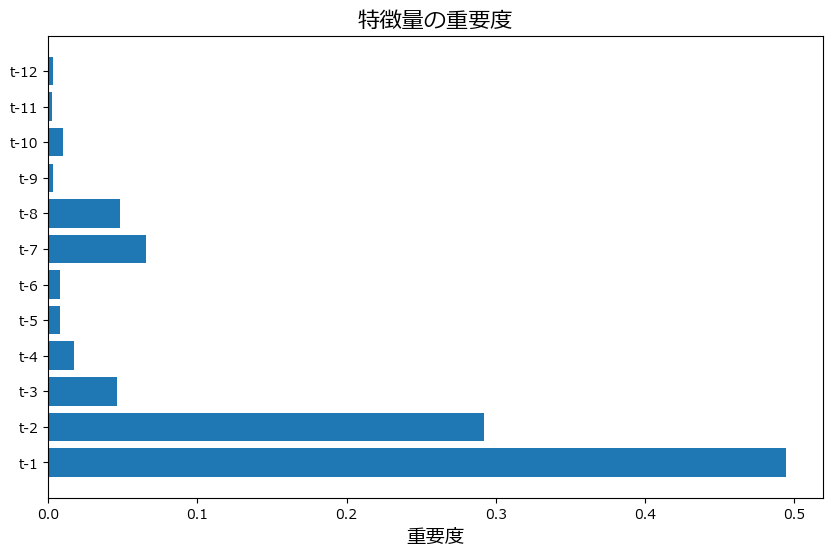

C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


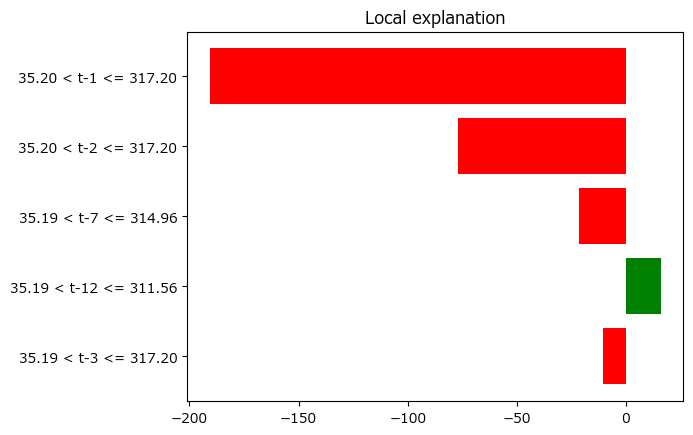

In [1]:
# 必要なライブラリをインポート
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lime.lime_tabular
import matplotlib.font_manager as fm

# 1. 日本語フォントの設定（Windows: Meiryo, Mac: Hiragino Sans, Linux: Noto Sans CJK JP）
font_path = ""
if os.name == 'nt':  # Windows
    font_path = "C:/Windows/Fonts/meiryo.ttc"
elif os.name == 'posix':  # Mac or Linux
    font_path = "/Library/Fonts/Hiragino Sans GB W3.otf"

# フォントが見つかった場合、設定を行う
if font_path:
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())

# 2. カレントディレクトリの確認
print("カレントディレクトリ:", os.getcwd())

# 3. CSVファイルの読み込み（カレントディレクトリから）
data = pd.read_csv("lags_12months_features.csv")

# 4. データの確認（カラム名と先頭5行を表示）
print("カラム名一覧:", data.columns)
print(data.head())

# 5. 目的変数のカラム名を指定（'t'が目的変数と仮定）
target_column = 't'

# 6. 目的変数と特徴量の分離
try:
    X = data.drop(target_column, axis=1)
    y = data[target_column]
except KeyError:
    print(f"エラー: '{target_column}' カラムが見つかりません。")
    exit()

# 7. データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. ランダムフォレスト回帰モデルの構築と学習
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 9. テストデータでの予測と評価
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"平均二乗誤差 (MSE): {mse}")

# 10. 特徴量の重要性を取得し、可視化
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('重要度', fontsize=14)
plt.title('特徴量の重要度', fontsize=16)
plt.gca().invert_yaxis()  # y軸を反転して上位の特徴量を上に表示
plt.show()

# 11. LIMEによる予測の解釈
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    mode='regression'
)

# 12. テストデータの最初のインスタンスでLIMEを使った解釈を表示
i = 0  # インデックスを指定
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict, num_features=5)

# 13. 解釈結果をグラフで表示
fig = exp.as_pyplot_figure()
plt.show()
